In [1]:
import pandas as pd
import os
from ast import literal_eval
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/raw_data'

#1. Clustering

In [6]:
solvedProblem_level = pd.read_csv(os.path.join(DATA_DIR, 'solvedProblem_level.csv'))
solvedProblem_level

,handle,count,problemIds,Counter,IdwithLevel,Counter_object,max_level,cluster
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...","[3, 3, 1, 1, 2, 2, 1, 2, 12, 4, 6, 3, 15, 7, 1...","[{4101: 3}, {10250: 3}, {16394: 1}, {20492: 1}...","{3: 103, 1: 72, 2: 78, 12: 15, 4: 58, 6: 40, 1...",24,4.0
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...","[4, 9, 3, 7, 5, 4, 2, 7, 2, 11, 4, 7, 7, 6, 3,...","[{2562: 4}, {1541: 9}, {4101: 3}, {1543: 7}, {...","{4: 21, 9: 5, 3: 24, 7: 10, 5: 8, 2: 15, 11: 3...",12,3.0
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...","[9, 1, 1, 7, 1, 2, 1, 1, 11]","[{15965: 9}, {1000: 1}, {1001: 1}, {1388: 7}, ...","{9: 1, 1: 5, 7: 1, 2: 1, 11: 1}",11,2.0
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...","[4, 3, 9, 4, 12, 10, 11, 8, 10, 4, 11, 12, 11,...","[{2562: 4}, {1547: 3}, {11279: 9}, {2577: 4}, ...","{4: 6, 3: 15, 9: 8, 12: 11, 10: 14, 11: 15, 8:...",16,3.0
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...","[4, 6, 13, 1, 15, 5, 3, 1, 1, 1, 1, 4, 2, 1, 1...","[{2562: 4}, {1018: 6}, {11779: 13}, {10757: 1}...","{4: 19, 6: 18, 13: 3, 1: 71, 15: 12, 5: 9, 3: ...",20,4.0
...,...,...,...,...,...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]","[10, 10, 11, 6, 11, 11]","[{1697: 10}, {2178: 10}, {7569: 11}, {2578: 6}...","{10: 2, 11: 3, 6: 1}",11,2.0
59889,zzzzong123,3.0,"[1931, 10868, 1158]","[9, 15, 6]","[{1931: 9}, {10868: 15}, {1158: 6}]","{9: 1, 15: 1, 6: 1}",15,3.0
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...","[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 2, ...","[{2438: 3}, {2439: 3}, {11021: 3}, {11022: 3},...","{3: 10, 2: 6, 1: 10, 4: 1}",4,1.0
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...","[8, 6, 3, 3, 8, 5, 6, 6, 7, 3, 6, 11, 2, 8, 10...","[{17413: 8}, {1158: 6}, {2438: 3}, {2439: 3}, ...","{8: 9, 6: 5, 3: 8, 5: 3, 7: 5, 11: 2, 2: 4, 10...",15,3.0


In [34]:
userLevel = pd.read_csv(os.path.join(DATA_DIR, 'userLevel.csv'))
userLevel

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,5.0,72.0,78.0,103.0,58.0,26.0,40.0,33.0,34.0,22.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,16.0,15.0,24.0,21.0,8.0,12.0,10.0,9.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,9.0,6.0,15.0,6.0,4.0,7.0,4.0,15.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,71.0,21.0,19.0,19.0,9.0,18.0,6.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59888,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59889,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59890,0.0,10.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59891,0.0,10.0,4.0,8.0,2.0,3.0,5.0,5.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
userLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59893 non-null  float64
 1   1       59893 non-null  float64
 2   2       59893 non-null  float64
 3   3       59893 non-null  float64
 4   4       59893 non-null  float64
 5   5       59893 non-null  float64
 6   6       59893 non-null  float64
 7   7       59893 non-null  float64
 8   8       59893 non-null  float64
 9   9       59893 non-null  float64
 10  10      59893 non-null  float64
 11  11      59893 non-null  float64
 12  12      59893 non-null  float64
 13  13      59893 non-null  float64
 14  14      59893 non-null  float64
 15  15      59893 non-null  float64
 16  16      59893 non-null  float64
 17  17      59893 non-null  float64
 18  18      59893 non-null  float64
 19  19      59893 non-null  float64
 20  20      59893 non-null  float64
 21  21      59893 non-null  float64
 22

In [10]:
cluster1 = solvedProblem_level.index[solvedProblem_level['cluster']==1]
cluster2 = solvedProblem_level.index[solvedProblem_level['cluster']==2]
cluster3 = solvedProblem_level.index[solvedProblem_level['cluster']==3]
cluster4 = solvedProblem_level.index[solvedProblem_level['cluster']==4]

##1-1. PCA for displaying clusters

In [36]:
userLevel_arr = userLevel.to_numpy()
userLevel_arr

array([[ 5., 72., 78., ...,  0.,  0.,  0.],
       [ 0., 16., 15., ...,  0.,  0.,  0.],
       [ 0.,  5.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0., 10.,  6., ...,  0.,  0.,  0.],
       [ 0., 10.,  4., ...,  0.,  0.,  0.],
       [ 0., 12.,  8., ...,  0.,  0.,  0.]])

In [37]:
# normalize
for r in range(len(userLevel_arr)):
  userLevel_arr[r] = (userLevel_arr[r]-np.min(userLevel_arr[r]))/(np.max(userLevel_arr[r])-np.min(userLevel_arr[r]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
userLevel_arr[np.isnan(userLevel_arr)] = 0

In [41]:
# pca
pca  = sklearn.decomposition.PCA(n_components=2)
pca.fit(userLevel_arr)
pca_arr = pca.transform(userLevel_arr)

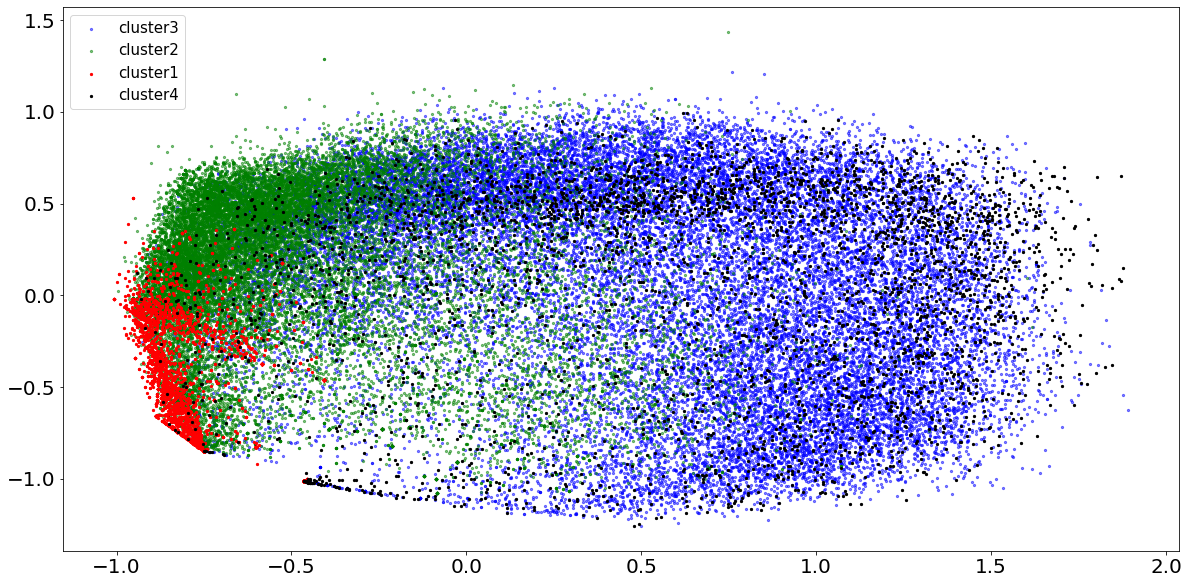

In [76]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(pca_arr[cluster3,0],pca_arr[cluster3,1], label="cluster3", s=5, c='blue')
plt.scatter(pca_arr[cluster2,0],pca_arr[cluster2,1], label="cluster2",s=5, c='green')
plt.scatter(pca_arr[cluster1,0],pca_arr[cluster1,1], label="cluster1",s=5, c='red')
plt.scatter(pca_arr[cluster4,0],pca_arr[cluster4,1], label="cluster4",s=5, c='black')
plt.legend(loc="upper left", fontsize=15)
plt.show()
#plt.savefig("image.png")

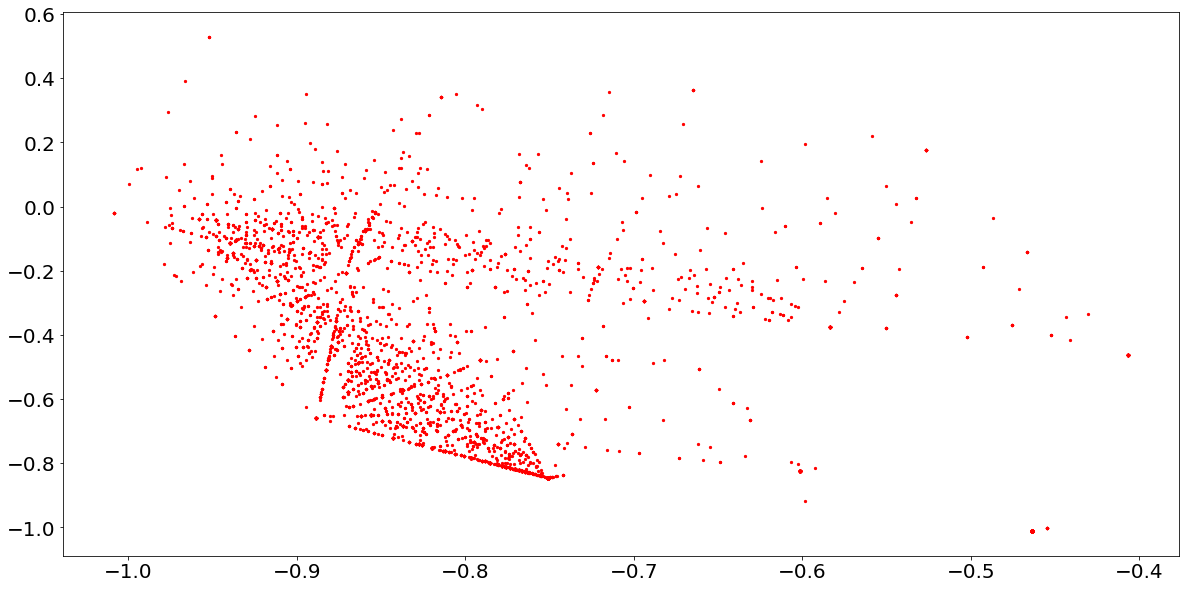

In [78]:
plt.scatter(pca_arr[cluster1,0],pca_arr[cluster1,1], label="cluster1",s=5, c='red')
plt.show()

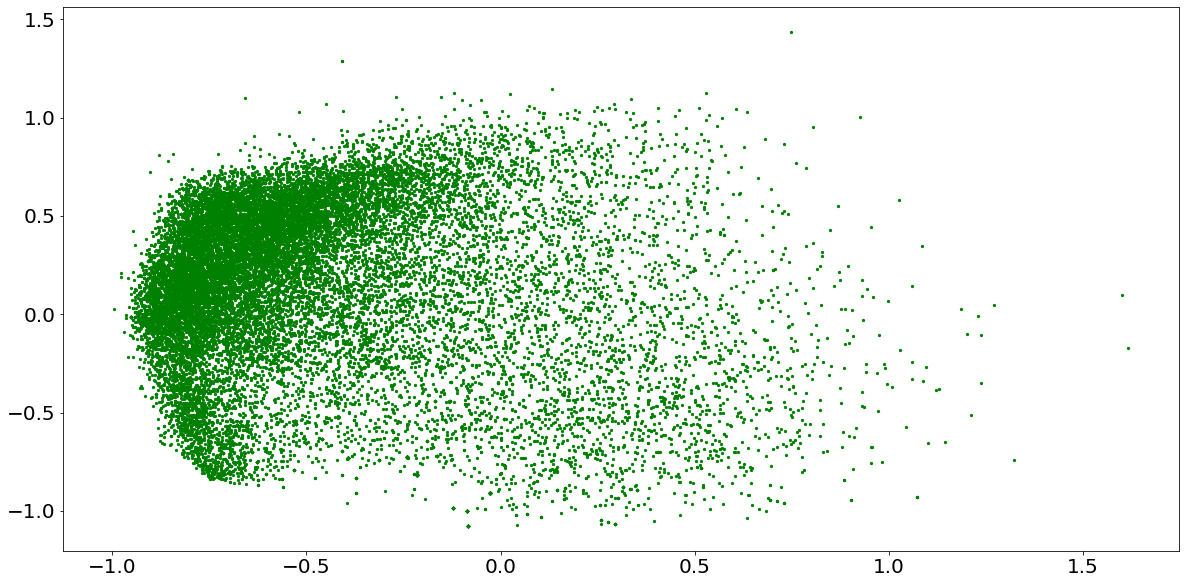

In [79]:
plt.scatter(pca_arr[cluster2,0],pca_arr[cluster2,1], label="cluster2",s=5, c='green')

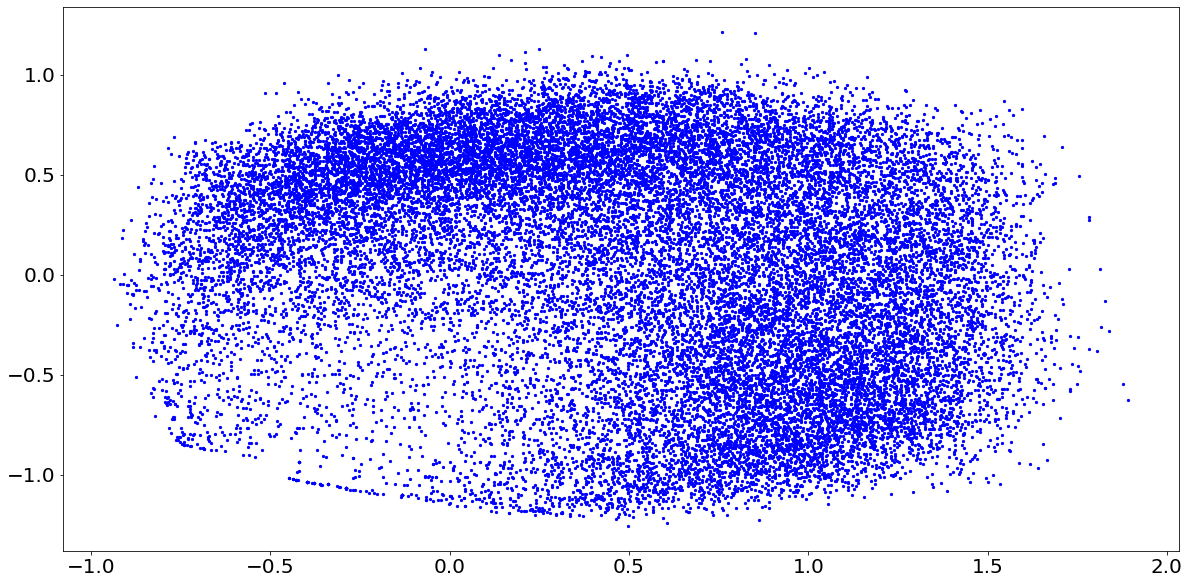

In [80]:
plt.scatter(pca_arr[cluster3,0],pca_arr[cluster3,1], label="cluster3", s=5, c='blue')

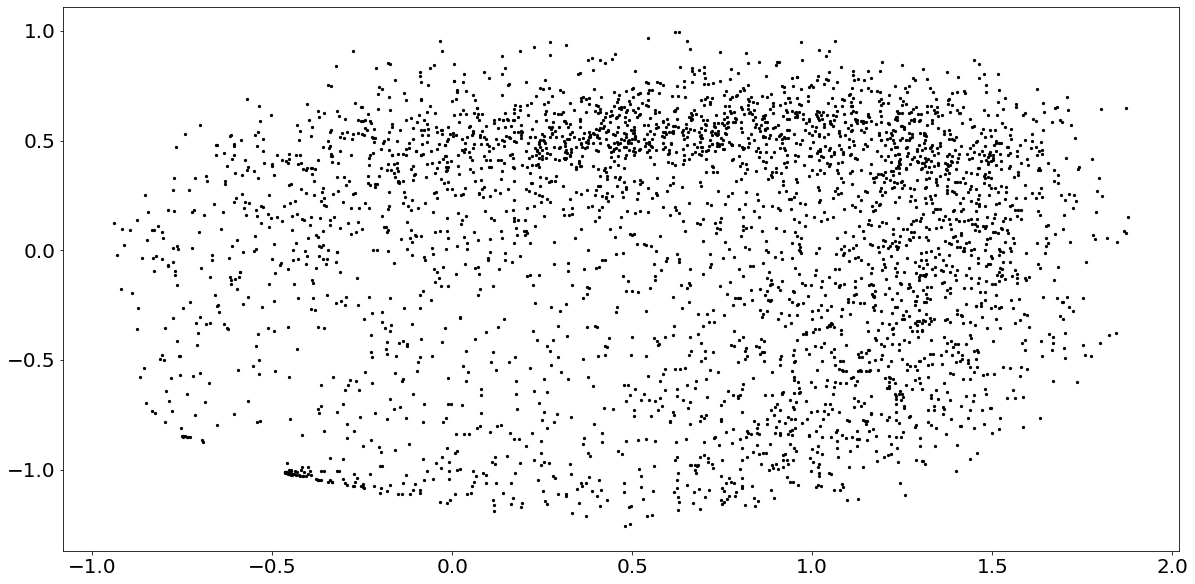

In [81]:
plt.scatter(pca_arr[cluster4,0],pca_arr[cluster4,1], label="cluster4",s=5, c='black')